In [161]:
# 뉴턴의 방법 (Newton's Method)
    # 실수값 0점에 근사시키는 방법

# 뉴턴의 방법을 구현하기 위해서 필요한 함수 목록
  # 1) x, f(x)          (함수)
  # 2) f'(x), y', df/dx (도함수)
  # 3) x 값을 업데이트
  # 4) y 절편 값을 알아야 그림을 그릴 수 있다

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


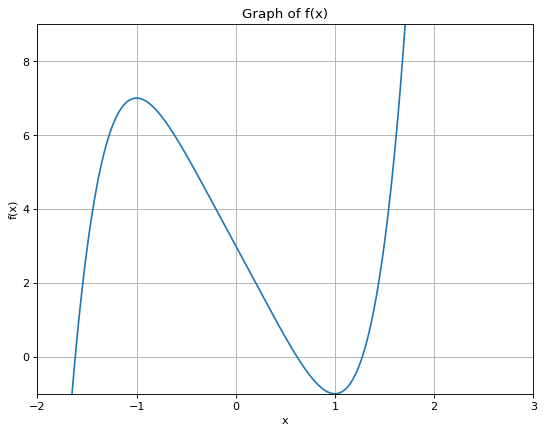

In [162]:
## 1) 함수 그래프 그리기
  # 변수란 무엇인가? - 데이터가 발생할 수 있는 범위
  # unsigned char :  1 Byte -> [0, 255]
  # f(x)의 그래프를 그린다

x = np.linspace(-3, 3, 601);
y = x**5 - 5*x + 3
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.grid('on');
plt.axis([-2, 3, -1, 9]);


In [163]:
## 2) 함수 정의부
  # 각 함수의 명칭에 맞게 함수를 표현하라.

def f(x):
  return x**5 - 5*x +3

def fp(x):
  return 5*x**4 -5  # 도함수

def y_int(x):
  return f(x) - fp(x)*x # y=ax+b 에서 y 절편 b를 반환하는 함수

def updateX(x):
  return x - f(x)/fp(x) # x값을 업데이트 x - 함수/도함수, 경사로를 따라 내려오며 x값을 업데이트


1.6666666666666667


/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/371578341.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerlines,_ ,_ = plt.stem(x0, y0, markerfmt='*r', linefmt='--k',


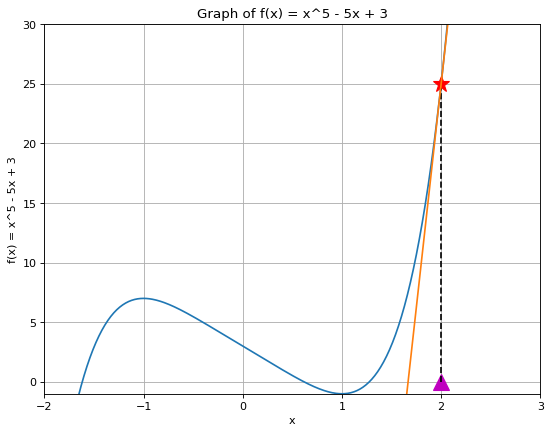

In [164]:
## 3) 초기값 설정하기

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('f(x) = x^5 - 5x + 3')
plt.title('Graph of f(x) = x^5 - 5x + 3')
plt.grid('on');
plt.axis([-2, 3, -1, 30]);

x0 = 2.0 # 초기값
y0 = f(x0) 

plt.plot(x0, 0, '^m', markersize=15)
markerlines,_ ,_ = plt.stem(x0, y0, markerfmt='*r', linefmt='--k',
                            use_line_collection=True)
markerlines.set_markersize(15)

# tangent line
t_x = np.linspace(1, 3, 2)
t_y = fp(x0) * t_x + y_int(x0)
plt.plot(t_x, t_y)

x1 = updateX(x0)
print(x1)

/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/3281200515.py:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerlines, _, _ = plt.stem([x], [y],


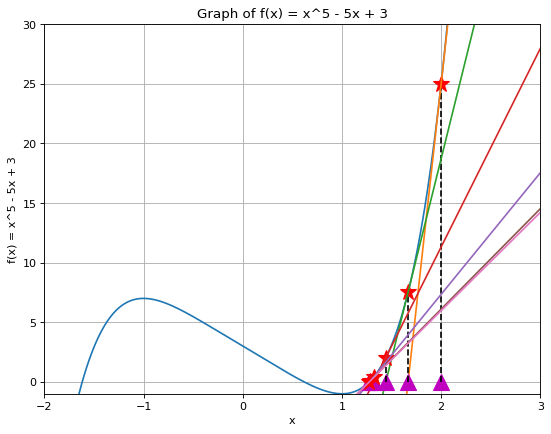

x: 2.0, y: 25.0
x: 2.0, y: 25.0
x: 1.6666666666666667, y: 7.526748971193419
x: 1.4425245098039217, y: 2.0335791588808565
x: 1.3203894179424422, y: 0.41143192445525045
x: 1.28004389562658, y: 0.036343556203827454
x: 1.275729410637414, y: 0.0003891066847003799
Total iterations: 7


In [165]:
## 4) 경사로를 따라 내려오기

# 그래프 설정
def setup_graph():
    x = np.linspace(-2, 3, 400)
    y = f(x)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x) = x^5 - 5x + 3')
    plt.title('Graph of f(x) = x^5 - 5x + 3')
    plt.grid('on')
    plt.axis([-2, 3, -1, 30])

# 초기화 및 설정
x = 2.0  # 초기 추측값 변경
y = f(x)
x_history = [x]
y_history = [f(x)]

# 그래프 설정
setup_graph()

# 반복 과정 수행
n_iterations = 100  # 반복 횟수
y_prev = float('inf') # 이전 y 값 초기화
threshold = 0.01 # 종료 조건
sum_iterations = 0 #종료까지 걸린 총 반복 횟수
for i in range(n_iterations):  # 수정할 코드
    y = f(x)  # y 값 계산
    sum_iterations += 1
    if abs(y - y_prev) < threshold:
        break
    # 현재 x 위치와 y 값을 히스토리에 저장
    x_history.append(x)
    y_history.append(y)

    #이전 y 값 업데이트
    y_prev = y
    # 현재 x 위치 표시
    plt.plot(x, 0, '^m', markersize=15)
    markerlines, _, _ = plt.stem([x], [y],
                                 markerfmt='*r',
                                 linefmt='--k',
                                 use_line_collection=True)
    markerlines.set_markersize(15)

    # 접선 그리기
    t_x = np.linspace(-3, 3, 2) # 접선의 x 값
    t_y = fp(x) * t_x + y_int(x) # 접선의 y 값
    plt.plot(t_x, t_y) # 접선 그리기

    # x 값 업데이트
    x = updateX(x)

# 반복문 종료 후 히스토리 출력
plt.show()
for x_val, y_val in zip(x_history, y_history):
    print(f"x: {x_val}, y: {y_val}")
print(f"Total iterations: {sum_iterations}")

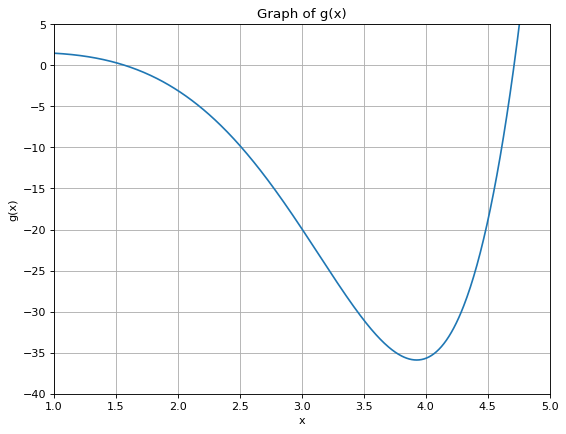

In [166]:
## 5) 함수 정의부
  # 다른 함수를 정의해보자.

def g(x):
    return np.cos(x) * np.exp(x)

def gp(x): #g(x)의 도함수 값을 반환
  return np.exp(x)*(np.cos(x) - np.sin(x))

def y_int(x): # y-절편의 값을 반환  y = ax + b 에서 b를 반환 식 : y = g(x) - g'(x)*x
  return g(x) - gp(x)*x 

def updateX(x, alpha = 0.04):  # 경사로를 따라 내려오며 x값을 갱신하는 함수  x - alpha * g'(x)
  return x- alpha * gp(x)

x = np.linspace(1, 5, 601);
y = g(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('g(x)')
plt.title('Graph of g(x)')
plt.grid('on');
plt.axis([1, 5, -40, 5]);

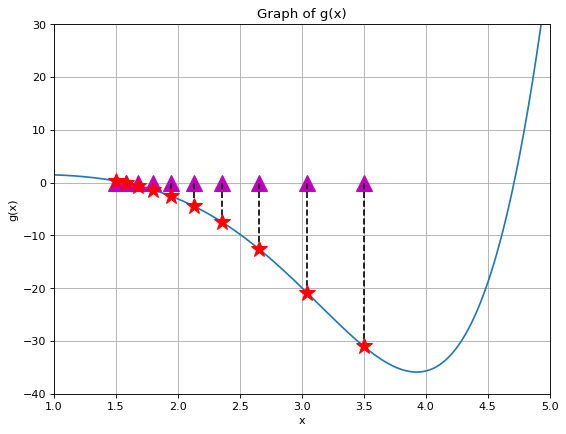

x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5830688047119992, y: -0.0597639651503883
x: 1.6816543015402285, y: -0.5945798898234431
x: 1.8003748755350222, y: -1.377217222513424
x: 1.945781778959919, y: -2.563483849442849
x: 2.127306547057092, y: -4.432997255465277
x: 2.358483996546851, y: -7.4946893177784375
x: 2.657586770360157, y: -12.623687772373257
x: 3.04278929471784, y: -20.861394141081114
x: 3.501375362408519, y: -31.037839364321062
Total iterations: 10


(3.888631507550958, -31.037839364321062)

In [167]:
## 6) 경사로를 따라 내려오기
# 그래프 설정
def setup_graph():
    x = np.linspace(1, 5, 601);
    y = g(x)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('Graph of g(x)')
    plt.grid('on')
    plt.axis([1, 5, -40, 30]);

# 초기화 및 설정
x = 1.5  # 초기 추측값 변경
x_history = [x]
y_history = [g(x)]
alpha = 0.02
epslion = 0.000001 # 종료 조건 (임계값)
# 그래프 설정
setup_graph()


# 반복 과정 수정
sum_iterations = 0 #종료까지 걸린 총 반복 횟수
n_iterations = 10  # 반복 횟수

for i in range(n_iterations):  # 수정할 코드
    y = g(x)

    if abs(gp(x)) < epslion:
        break
    # 현재 x 위치와 y 값을 히스토리에 저장
    x_history.append(x)
    y_history.append(y)

    # 현재 x 위치 표시
    plt.plot(x, 0, '^m', markersize=15)
    markerlines, _, _ = plt.stem([x], [y],
                                 markerfmt='*r',
                                 linefmt='--k',
                                 )
    markerlines.set_markersize(15)

    # x 값 업데이트
    sum_iterations += 1
    x = updateX(x, alpha)

# 반복문 종료 후 히스토리 출력
plt.show()
for x_val, y_val in zip(x_history, y_history):
    print(f"x: {x_val}, y: {y_val}")
print(f"Total iterations: {sum_iterations}")

(x, y)

/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/773265275.py:7: RuntimeWarning: overflow encountered in exp
  return np.cos(x) * np.exp(x)
/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/773265275.py:10: RuntimeWarning: overflow encountered in exp
  return np.exp(x)*(np.cos(x) - np.sin(x))
/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/773265275.py:7: RuntimeWarning: invalid value encountered in cos
  return np.cos(x) * np.exp(x)
/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/773265275.py:10: RuntimeWarning: invalid value encountered in cos
  return np.exp(x)*(np.cos(x) - np.sin(x))
/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_9114/773265275.py:10: RuntimeWarning: invalid value encountered in sin
  return np.exp(x)*(np.cos(x) - np.sin(x))


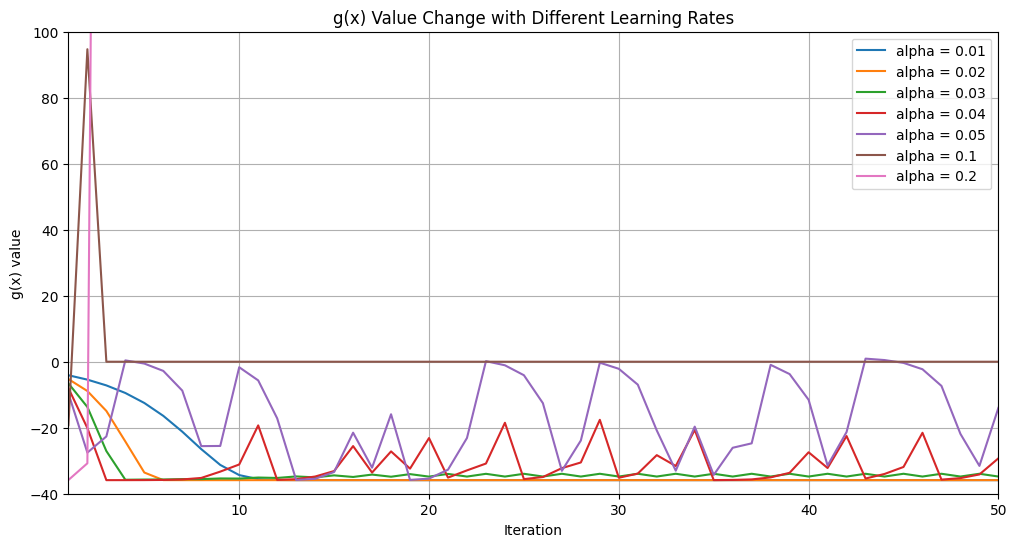

In [168]:
## 7) 학습률에 따른 경사의 변화 관찰하기
  # 수정할 코드 없음

# 학습률(alpha)에 따른 y 값의 변화 추이를 시각화하는 함수
def plot_learning_rates(alphas, n_iterations=20):
    x_initial = 2  # 초기 추측값

    for alpha in alphas:
        x = x_initial
        y_history = [g(x)]

        for _ in range(n_iterations):
            x = updateX(x, alpha)
            y_history.append(g(x))

        plt.plot(y_history, label=f'alpha = {alpha}')

# 다양한 학습률에 대한 시각화
n_iterations = 50
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]
plt.figure(figsize=(12, 6))
plot_learning_rates(alphas, n_iterations)

plt.xlabel('Iteration')
plt.ylabel('g(x) value')
plt.title('g(x) Value Change with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.axis([1, n_iterations, -40, 100]);
plt.show()
